#Table of Contents
* [Set up](#Set-up)
* [Definitions](#Definitions)
* [Compare $I(z)$ for several values of $\alpha$](#Compare-$I%28z%29$-for-several-values-of-$\alpha$)
* [Now look at what happens to the dose as a function of depth for different layer exposure times](#Now-look-at-what-happens-to-the-dose-as-a-function-of-depth-for-different-layer-exposure-times)
* [Relationship between depth and exposure time for a given critical dose](#Relationship-between-depth-and-exposure-time-for-a-given-critical-dose)


# Set up

In [2]:
%%javascript
IPython.load_extensions('calico-document-tools');

<IPython.core.display.Javascript object>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
from __future__ import division
from __future__ import print_function

# Definitions

Irradiance, $I(z)$, (W/cm$^2$) as a function of depth, $z$:

$$I(z) = I_0 \mathrm{e}^{-\alpha z}$$

Dose, $D(z,t)$, (J/cm$^2$) as a function of depth, $z$, and exposure time per layer, $t_{l}$:

$$\begin{aligned} \\
D(z,t) &= t_l I(z) \\
&= t_l I_0 \mathrm{e}^{-\alpha z} \\
\end{aligned}$$


# Compare $I(z)$ for several values of $\alpha$

Let's examine several arbitary absorption coefficients, $\alpha_1$ and $\alpha_2$ in units of $\mu m^{-1}$

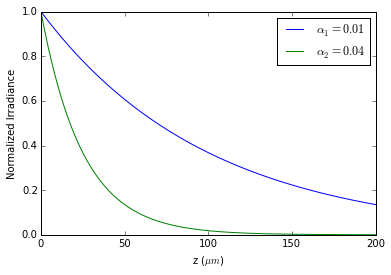

In [4]:
alpha1 = 1./100.0
alpha2 = 1./25.0
z = np.linspace(0,200,201)
Inorm1 = np.exp(-alpha1*z)
Inorm2 = np.exp(-alpha2*z)
label1 = r'$\alpha_1 = {0}$'.format(alpha1)
label2 = r'$\alpha_2 = {0}$'.format(alpha2)

fig, ax = plt.subplots()
ax.plot(z,Inorm1,label=label1)
ax.plot(z,Inorm2,label=label2)
ax.set_xlabel('z ($\mu m$)')
ax.set_ylabel('Normalized Irradiance')
ax.legend();

# Now look at what happens to the dose as a function of depth for different layer exposure times

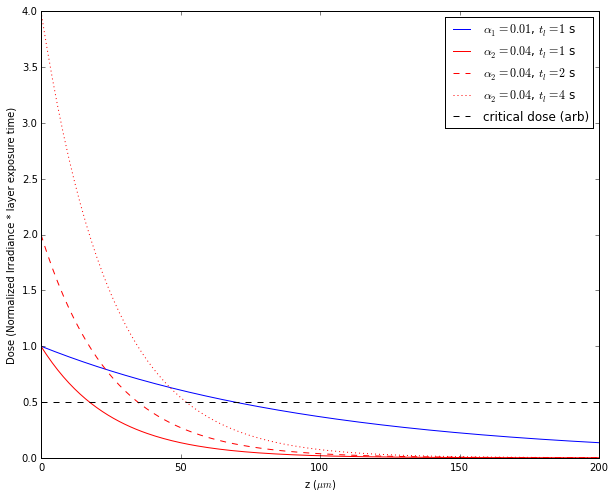

In [5]:
t_layer = 1.0
dose1 = t_layer * Inorm1
dose2 = t_layer * Inorm2
dose3 = 2 * t_layer * Inorm2
dose4 = 4 * t_layer * Inorm2
critical_dose = 0.5 * np.ones(len(z))

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(z,dose1,label=label1+', $t_l=1$ s')
ax.plot(z,dose2, 'r-', label=label2+', $t_l=1$ s')
ax.plot(z,dose3, 'r--', label=label2+', $t_l=2$ s')
ax.plot(z,dose4, 'r:', label=label2+', $t_l=4$ s')
ax.plot(z,critical_dose, 'k--', label='critical dose (arb)')
ax.set_xlabel('z ($\mu m$)')
ax.set_ylabel('Dose (Normalized Irradiance * layer exposure time)')
ax.legend();

# Relationship between depth and exposure time for a given critical dose

The critical dose, $D_c$, at which polymerization has proceeded far enough to result in a solid material can be written as 

$$D_c = t_{ld} I_0 \mathrm{e}^{-\alpha z_d}$$

where $t_{ld}$ and $z_d$ represent a family of paired values for which the above equation is true (recall, $D_c$ is some constant value for a given resin formulation so picking $t_{ld}$ sets $z_d$ and vice versa). 

Note that $D_c/I_0$ has units of time. We can define

$$T_c = \frac{D_c}{I_0}$$

where $T_c$ is the critical time, i.e., the time it takes to reach the critical dose given an optical irradiance of $I_0$. We can solve the first equation for the exposure depth, $z_d$, in terms of the layer exposure time, $t_{ld}$, as

$$z_d = \frac{1}{\alpha} \ln(\frac{t_l}{T_c})$$

Let's explore this relationship as a function of the normalized time, $t_n = t_l/T_c$. Note that when $t_n = 1$, the resin at $z = 0$ has received just enough dose to become solidified, but resin at $z \gt 0$ has not.

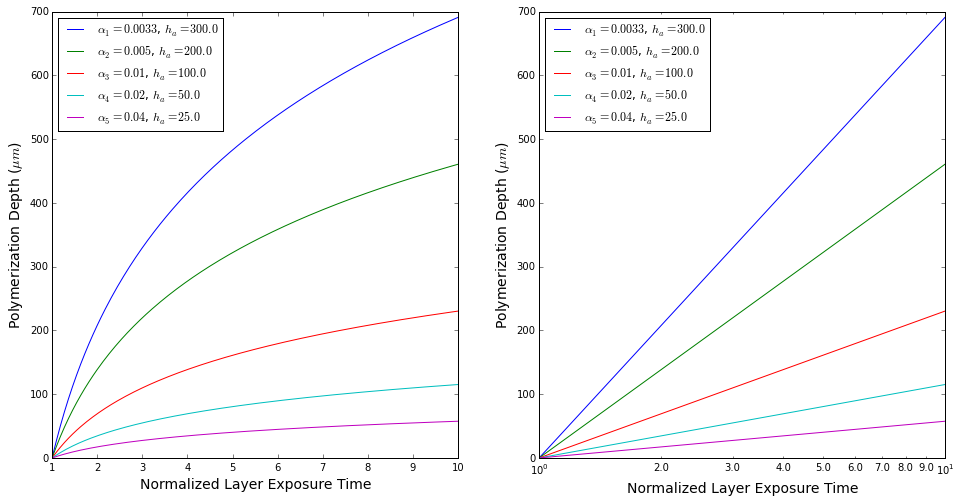

In [29]:
alphaA = 1.0/300.
alphaB = 1.0/200.
alphaC = 1.0/100.
alphaD = 1.0/50.
alphaE = 1.0/25.
t_n = np.linspace(1.0,10.0,200)
z_A = np.log(t_n)/alphaA
z_B = np.log(t_n)/alphaB
z_C = np.log(t_n)/alphaC
z_D = np.log(t_n)/alphaD
z_E = np.log(t_n)/alphaE

label1 = r'$\alpha_1 = {0:.4f}$, $h_a = {1}$'.format(alphaA, 1.0/alphaA)
label2 = r'$\alpha_2 = {0}$, $h_a = {1}$'.format(alphaB, 1.0/alphaB)
label3 = r'$\alpha_3 = {0:.2f}$, $h_a = {1:.1f}$'.format(alphaC, 1.0/alphaC)
label4 = r'$\alpha_4 = {0}$, $h_a = {1}$'.format(alphaD, 1.0/alphaD)
label5 = r'$\alpha_5 = {0}$, $h_a = {1}$'.format(alphaE, 1.0/alphaE)

fontsize = 14
fig, (axlin, axlog) = plt.subplots(1,2,figsize=(16,8))

axlin.plot(t_n,z_A,label=label1)
axlin.plot(t_n,z_B,label=label2)
axlin.plot(t_n,z_C,label=label3)
axlin.plot(t_n,z_D,label=label4)
axlin.plot(t_n,z_E,label=label5)
axlin.set_xlabel('Normalized Layer Exposure Time', size=fontsize)
axlin.set_ylabel('Polymerization Depth ($\mu m$)', size=fontsize)
axlin.legend(loc='upper left')

axlog.set_xscale('log')
axlog.plot(t_n,z_A,label=label1)
axlog.plot(t_n,z_B,label=label2)
axlog.plot(t_n,z_C,label=label3)
axlog.plot(t_n,z_D,label=label4)
axlog.plot(t_n,z_E,label=label5)
axlog.set_xlabel('Normalized Layer Exposure Time', size=fontsize)
axlog.set_ylabel('Polymerization Depth ($\mu m$)', size=fontsize)
axlog.legend(loc='upper left')
axlog.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"));

We observe that, indeed, when $t_n = 1$ only the resin at $z = 0$ is polymerized. Note that when $t_n = X$, the material at $z = 0$ has received X times the critical dose. 

We can define $h_a = 1/\alpha$, in which case 

$$z_d = \frac{1}{\alpha} \ln(\frac{t_l}{T_c})$$

becomes 

$$z_d = h_a\ln(\frac{t_l}{T_c})$$

Moreover, 

$$\begin{aligned} \\
\alpha z &= \frac{z}{h_a} \\
&= z_n \\
\end{aligned}$$

where $z_n$ is the normalized distance into the resin. We can rewrite the polymerization depth as 

$$z_n = \ln(t_n)$$

Note that when $z_n = 1$ (i.e., $z = h_a$) the dose is such that the polymerization depth is $h_a$. It's clear that when a dose is applied that results in polymerization to a depth of $h_a$, the normalized exposure time is

$$\begin{aligned} \\
t_n &= \mathrm{e}^{z_n = 1} \\
&= \mathrm{e} \\
\end{aligned}$$

such that the $z=0$ layer of resin has received a dose that is $\mathrm{e} = 2.72$ times bigger than the critical dose.